In [1]:
%matplotlib notebook

# Dependencies
import os
import sys
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle, islice
import shutil
pd.options.mode.chained_assignment = None  # default='warn'

## Demographic Data Merge by Jane
* #### Merging all demographic output cvs data
* #### Select only high level result

In [2]:
# Set directory file paths
demo_path = os.path.join(".", "Team/Charleen")
country_pop_path = os.path.join(".", "Output/Demographic", "country_pop_2010-17.csv")
state_pop_path = os.path.join(".", "Output/Demographic", "state_pop_2010-17.csv")
state_co_path = os.path.join(".", "Output/Business", "state_co_ttl_2012-16.csv")
# state_crime_path = os.path.join(".", "Output/Crime", "CrimeDataFinal.csv")
all_demo_path = os.path.join(".", "Output/Demographic", "state_demo_2017.csv")
error_path = os.path.join(".", "Output", "data_analysis_error.txt")

# print(f'{country_pop_path}, {state_pop_path}')

In [3]:
# Read population data and select only 2017
state_pop_data = pd.read_csv(state_pop_path, index_col=0)
all_data_df = state_pop_data[["State", "2017", "2016", "2015"]].rename(columns={"2017": "Pop_2017", "2016": "Pop_2016", "2015": "Pop_2015"})
all_data_df.count()


State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
dtype: int64

In [4]:
# Read company data and select only 2016 (most recent)
state_co_data = pd.read_csv(state_co_path, index_col=0)
state_co_df = state_co_data[["State", "2016_#Companies"]].rename(columns={"2016_#Companies": "Co_2016"})
# Merge data by state
all_data_df = pd.merge(all_data_df, state_co_df, how='inner', on='State')
all_data_df.count()

State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
Co_2016     51
dtype: int64

In [5]:
# Read all files from directory - Output/Demographic folder
xList = [x for x in os.listdir(demo_path)]

# Open text file in APPEND mode (a, r - read, w -write)
with open(error_path, "a") as xfile:
    
    # Loop thru the file list and write info to opened text file if criteria are met
    for x in xList:                
        # If error, record exception
        try:
            # Split the extension from the path and normalise it to lowercase.
            ext = os.path.splitext(x)[-1].lower()
            excel = os.path.splitext(x)[0].lower()

            # If it's csv file, read to dataframe and merge as it loop
            if ext == ".csv": 
                demo_data = pd.read_csv(f'{demo_path}/{x}', index_col=0)
                # -------------------------------------------------------------------------------------------
                # Merge data by state
                all_data_df = pd.merge(all_data_df, demo_data, how='inner', on='State')

        except Exception as e:
            # Write error to text file if occurs
            xfile.write(f'****************************************************************************\n')
            xfile.write(f'### {x} ###\n')  # Write file name to text file            
            xfile.write("Exception occurred: {}".format(e) + "\n")  # Write error to text file

# Display merged result
all_data_df.count()

State                    51
Pop_2017                 51
Pop_2016                 51
Pop_2015                 51
Co_2016                  51
2013 Under 5 years       51
2014 - Under 5 years     51
2015 - Under 5 years     51
2016 - Under 5 years     51
2017 - Under 5 years     51
2013 - 5 to 9 years      51
2014 - 5 to 9 years      51
2015 - 5 to 9 years      51
2016 - 5 to 9 years      51
2017 - 5 to 9 years      51
2013 - 10 to 14 years    51
2014 - 10 to 14 years    51
2015 - 10 to 14 years    51
2016 - 10 to 14 years    51
2017 - 10 to 14 years    51
2013 - 15 to 19 years    51
2014 - 15 to 19 years    51
2015 - 15 to 19 years    51
2016 - 15 to 19 years    51
2017 - 15 to 19 years    51
2013 - 20 to 24 years    51
2014 - 20 to 24 years    51
2015 - 20 to 24 years    51
2016 - 20 to 24 years    51
2017 - 20 to 24 years    51
                         ..
Native_14                51
Asian_14                 51
Hawaiian_Other_14        51
Other_14                 51
Mixed_Race_14       

In [6]:
# Read crime data and select only 2015 (most recent)
# state_crime_data = pd.read_csv(state_crime_path, index_col=0).reset_index()
# state_crime_data["State"] = state_crime_data.State.str.capitalize()
# state_crime_df = state_crime_data[["State", "Crime 2015"]].rename(columns={"Crime 2015": "Crime_2015"}).astype(str)
# state_crime_df.count()

In [7]:
# # Merge data by state
# all_data_df = pd.merge(all_data_df, state_crime_df, how="left", on='State')
# all_data_df.count()

In [31]:
# If exist, open output file & print result if error occurs
if os.path.exists(error_path):
    print(open(error_path).read())

In [30]:
# # If exist, delete error file
# if os.path.exists(error_path):
#     os.remove(error_path)

In [9]:
# Rename columns
all_df = all_data_df.reindex(columns=["State", "Pop_2017", "%_M_17", "%_F_17", "Ttl$_Households_17", "Households_Earnings%_17", "Mean_Earnings$_17", "Edu_25+yrs_ttl17", "25+yrs_<high_school_17", "25+yrs_high_school_17", "25+yrs_college_17", "25+yrs_>B.S._17", "All_Races_17", "White_17", "Black_17", "Native_17", "Asian_17", "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Pop_2016", "Co_2016", "Pop_2015"])
all_df["Pop_2017"] = all_df["Pop_2017"].str.replace(",", "").astype(int)
all_df.head()

,State,Pop_2017,%_M_17,%_F_17,Ttl$_Households_17,Households_Earnings%_17,Mean_Earnings$_17,Edu_25+yrs_ttl17,25+yrs_<high_school_17,25+yrs_high_school_17,...,White_17,Black_17,Native_17,Asian_17,Hawaiian_Other_17,Other_17,Mixed_Race_17,Pop_2016,Co_2016,Pop_2015
0,Alabama,4874747,48.5,51.5,1856695,72.4,67093,3276637,14.7,30.9,...,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"4,860,545",73976,"4,850,858"
1,Alaska,739795,52.3,47.7,252536,86.0,90061,475442,7.6,27.6,...,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"741,522",17059,"737,979"
2,Arizona,7016270,49.7,50.3,2482311,74.7,74501,4516175,13.5,24.2,...,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"6,908,642",106963,"6,802,262"
3,Arkansas,3004279,49.1,50.9,1147291,73.1,63854,1985770,14.4,34.3,...,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"2,988,231",50511,"2,975,626"
4,California,39536653,49.7,50.3,12888128,80.6,96538,25950818,17.5,20.6,...,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"39,296,476",751982,"39,032,444"


In [10]:
# Get % of educated people
# Select certain columns, format data, and save to csv
all_df["Edu%_25+yrs_ttl17"] = [round(((row["Edu_25+yrs_ttl17"]/row["Pop_2017"]) * 100),1) for i, row in all_df.iterrows()]
Demo_df = all_df[["State", "Pop_2017", "%_M_17", "%_F_17", "White_17", "Black_17", "Native_17", "Asian_17", 
                  "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Ttl$_Households_17", 
                  "Households_Earnings%_17", "Mean_Earnings$_17", "Edu%_25+yrs_ttl17"]]
namesList = ["Population", "Male (%)", "Female (%)", "White (%)", "Black (%)", "Native Indian (%)", 
             "Asian (%)", "Hawaiian / Pacific Islander (%)", "Others (%)", "Mixed Race (%)", "Total Households", 
             "Households w/Earnings (%)", "Average Earnings ($)", "25+ yrs w/Education (%)"]
Demo_df.columns = Demo_df.columns[:1].tolist() + namesList

Demo_df["Average Earnings ($)"] = Demo_df["Average Earnings ($)"].map('{:,.2f}'.format)
Demo_df["Population"] = Demo_df["Population"].map('{:,.2f}'.format)
Demo_df["Total Households"] = Demo_df["Total Households"].map('{:,.2f}'.format)
# Save cleaned data to csv & display
# All demo 
# Demo_df.to_csv(all_demo_path)
Demo_df.head()

,State,Population,Male (%),Female (%),White (%),Black (%),Native Indian (%),Asian (%),Hawaiian / Pacific Islander (%),Others (%),Mixed Race (%),Total Households,Households w/Earnings (%),Average Earnings ($),25+ yrs w/Education (%)
0,Alabama,"4,874,747.00",48.5,51.5,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"1,856,695.00",72.4,"67,093.00",67.2
1,Alaska,"739,795.00",52.3,47.7,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"252,536.00",86.0,"90,061.00",64.3
2,Arizona,"7,016,270.00",49.7,50.3,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"2,482,311.00",74.7,"74,501.00",64.4
3,Arkansas,"3,004,279.00",49.1,50.9,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"1,147,291.00",73.1,"63,854.00",66.1
4,California,"39,536,653.00",49.7,50.3,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"12,888,128.00",80.6,"96,538.00",65.6


## Top 5 States w/ most educated people 2017 by Jane
* #### Filter to get top 5 states and only selected columns
* #### Map the bar plot

In [21]:
# Top 5 States with the most educated people
Demo_df = Demo_df.sort_values(by='25+ yrs w/Education (%)', ascending=False)
Demo_top = pd.DataFrame(Demo_df.iloc[0:5,:]).reset_index(drop=True)
Demo_top.drop(Demo_top.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]],inplace=True, axis=1)
Demo_top


,State,25+ yrs w/Education (%)
0,Maine,71.9
1,West Virginia,71.2
2,Vermont,70.2
3,New Hampshire,70.0
4,Pennsylvania,69.4


In [22]:
# Rename column
Demo_top_df = Demo_top.rename(columns={"25+ yrs w/Education (%)": "Pct_Edu_Pop"}) # Demo_top.set_index("State")
Demo_top_df

,State,Pct_Edu_Pop
0,Maine,71.9
1,West Virginia,71.2
2,Vermont,70.2
3,New Hampshire,70.0
4,Pennsylvania,69.4


<IPython.core.display.Javascript object>


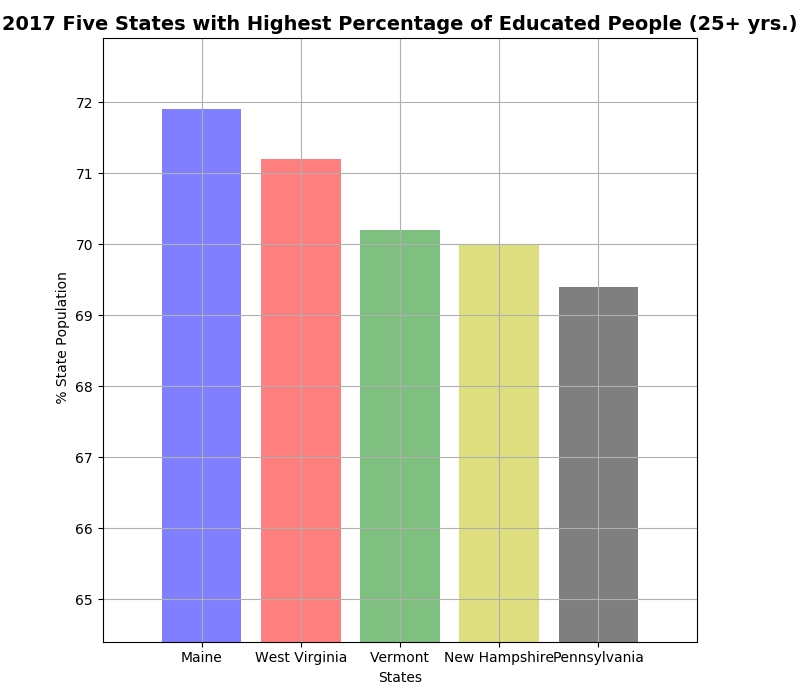

In [23]:
# % of population with educated people by state plot
Demo_top_df = Demo_top_df.set_index("State")
x_axis = np.arange(len(Demo_top_df))
y_axis = Demo_top_df["Pct_Edu_Pop"]

x_ticks = Demo_top_df.index
plt.figure(figsize=(8, 7))
plt.xticks(x_axis, x_ticks, rotation=0)
plt.grid()
# x_axis.color_cycle
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(Demo_top_df)))

plt.xlim(min(x_axis) -1, max(x_axis) + 1)
plt.ylim(min(y_axis) -5, max(y_axis) + 1)

plt.title("2017 Five States with Highest Percentage of Educated People (25+ yrs.)", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("States")
plt.ylabel(" % State Population")

plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5, align="center")
plt.tight_layout()

# plt.savefig("Images/Top%_Educated_State.png")
plt.show()


## Top 5 States w/ Most & Least Business 2016 by Jane
* #### Read data and filter top 5 states and select only certain columns
* #### Map the line plot

In [24]:
# Read data
business_data = pd.read_csv(state_co_path, index_col=0)

# Most businesses in 5 states
business_df = business_data.sort_values(by='2016_#Companies', ascending=False)
business_df = pd.DataFrame(business_df.iloc[0:5,:])
business_df

,State,2012_#Companies,2013_#Companies,2014_#Companies,2015_#Companies,2016_#Companies
4,California,701899,711086,724483,740303,751982
32,New York,450189,455727,459266,462660,465139
9,Florida,409368,417164,424551,435582,445126
43,Texas,404116,411538,419500,428461,434145
13,Illinois,253146,253743,254089,256016,256603


<IPython.core.display.Javascript object>


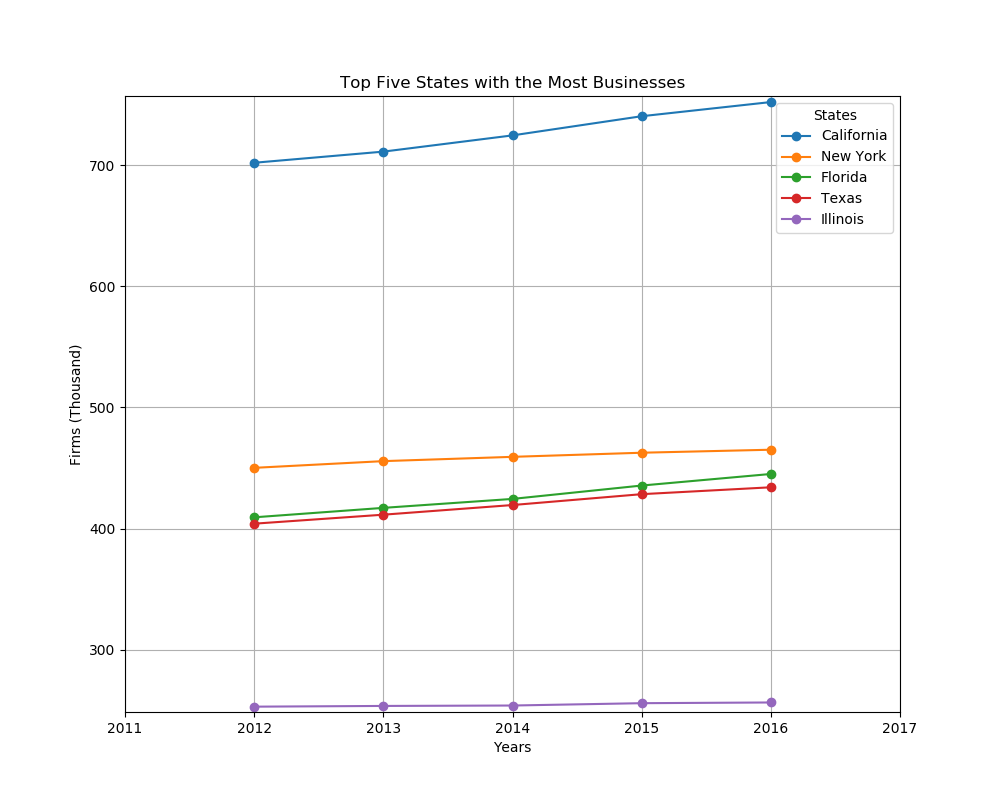

In [25]:
%matplotlib notebook

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

# Get state & map plot
state_list = business_df["State"].values.tolist()
business_df = business_df.set_index("State")
# Create a list of the years that we will use as our x axis
years = [2012,2013,2014,2015,2016]

for item in state_list:
    num_firm_yr = business_df.loc[item,["2012_#Companies","2013_#Companies", "2014_#Companies", "2015_#Companies", "2016_#Companies"]]
    plt.plot(years, (num_firm_yr/1000), marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top Five States with the Most Businesses")
plt.xlabel("Years")
plt.ylabel("Firms (Thousand)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
plt.ylim(min(business_df["2013_#Companies"]/1000) - 5, max(business_df["2016_#Companies"]/1000 + 5))
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
# plt.savefig("Images/Top5_States_Companies.png")
plt.show()


In [26]:
# Least businesses in 5 states
business_least = business_data.sort_values(by='2016_#Companies', ascending=True)
business_least = pd.DataFrame(business_least.iloc[0:5,:])
business_least

,State,2012_#Companies,2013_#Companies,2014_#Companies,2015_#Companies,2016_#Companies
1,Alaska,16656,16733,16841,16952,17059
50,Wyoming,17804,17741,17852,18111,17950
8,District of Columbia,17123,17304,17468,17832,18095
45,Vermont,18216,18176,18097,18126,18148
34,North Dakota,19520,19894,20305,20370,19979


<IPython.core.display.Javascript object>


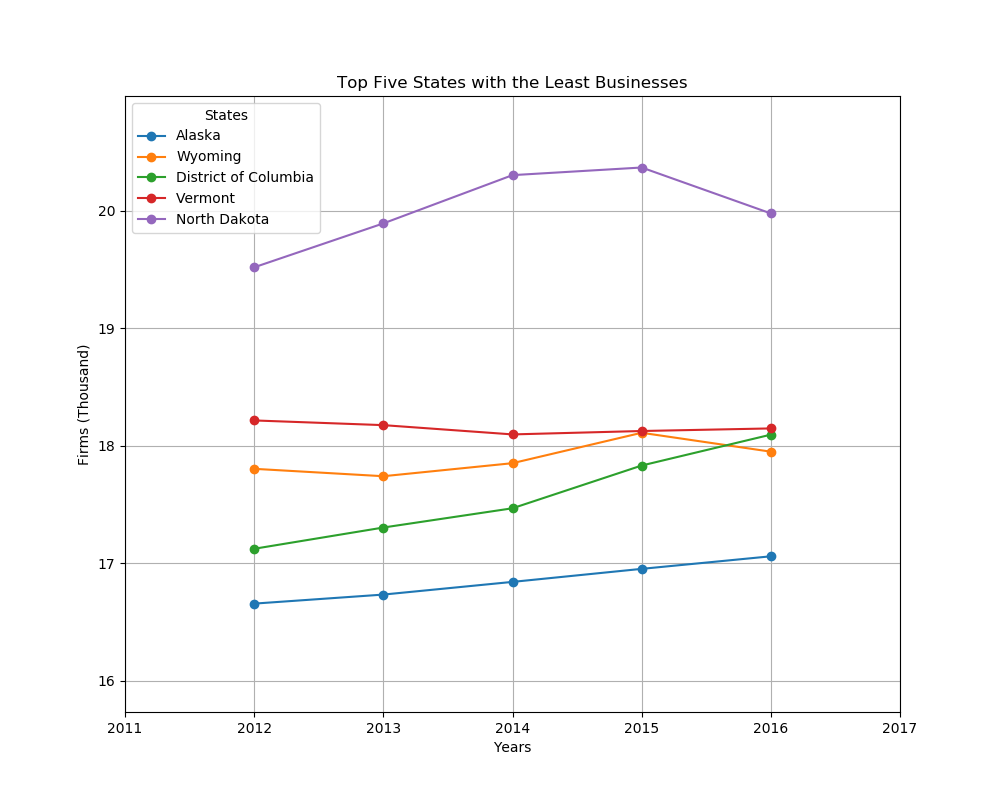

In [27]:
%matplotlib notebook

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

state2_list = business_least["State"].values.tolist()
business_least = business_least.set_index("State")
# Create a list of the years that we will use as our x axis
# years = [2012,2013,2014,2015,2016]

for item in state2_list:
    num_firm_yr = business_least.loc[item,["2012_#Companies","2013_#Companies", "2014_#Companies", "2015_#Companies", "2016_#Companies"]]
    plt.plot(years, (num_firm_yr/1000), marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top Five States with the Least Businesses")
plt.xlabel("Years")
plt.ylabel("Firms (Thousand)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
plt.ylim(min(business_least["2013_#Companies"]/1000) - 1, max(business_least["2016_#Companies"]/1000 + 1))
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
# plt.savefig("Images/Least5_States_Companies.png")
plt.show()


## US Population Pie Chart: 2017 by Jane
* #### High-level outlook by region

In [28]:
# Read population data and select only 2017
country_pop_data = pd.read_csv(country_pop_path, index_col=0)
ttl_pop_2017 = country_pop_data.iloc[0]["2017"]   #Get total US population in 2017
country_pop_df = country_pop_data.drop(country_pop_data.index[[0]])
country_pop_df["2017"] = country_pop_df ["2017"].replace({',': ''}, regex=True).astype(int)
country_pop_df["Pop%_2017"] = (country_pop_df["2017"]/country_pop_df["2017"].sum()) * 100  
country_pop_df


,Region,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,Pop%_2017
1,Northeast,"55,317,240","55,318,350","55,388,349","55,642,659","55,860,261","56,047,732","56,203,078","56,296,628","56,359,360",56470581,17.337199
2,Midwest,"66,927,001","66,929,794","66,973,360","67,141,501","67,318,295","67,534,451","67,720,120","67,839,187","67,978,168",68179351,20.931942
3,South,"114,555,744","114,563,024","114,869,241","116,060,993","117,291,728","118,422,269","119,699,966","121,081,238","122,423,457",123658624,37.964797
4,West,"71,945,553","71,946,937","72,107,471","72,799,127","73,522,988","74,230,053","74,999,361","75,822,786","76,644,950",77410622,23.766062


<IPython.core.display.Javascript object>


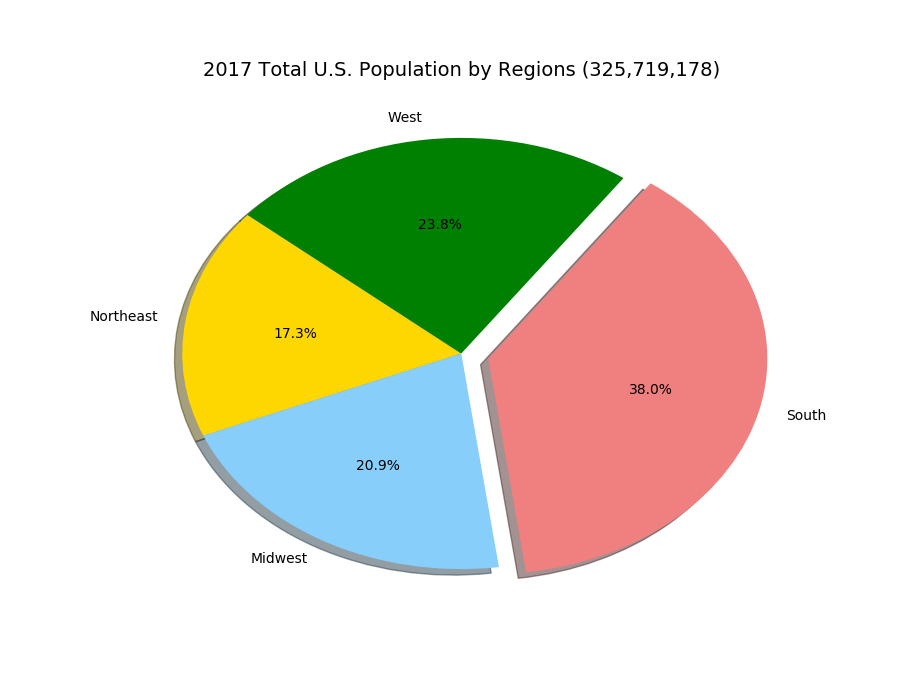

In [29]:
%matplotlib notebook

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd


# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral", "green"]
# Tells matplotlib to seperate the "Python" section from the others
explode = ( 0, 0, 0.1, 0)

# Oval Shape
plt.rcParams["figure.figsize"] = (9,7)

# Build Pie Chart
plt.pie(country_pop_df["Pop%_2017"], explode=explode, labels=country_pop_df["Region"], colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140)

plt.title(f"2017 Total U.S. Population by Regions ({ttl_pop_2017})", fontdict={'fontsize': 14, 'fontweight': 'medium'})

# Save Figure
# plt.savefig("Images/US_Region_Pop_2017.png")
plt.show()

## US Population by State: 2017 - Charleen
* #### Read data and map chart

In [62]:
%matplotlib inline
# Dependencies and Setup
from itertools import cycle, islice
# from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas


In [63]:
state_pop_per_17 = pd.read_csv("./Output/Demographic/statepopulationpercentage2017.csv", index_col=0)
state_pop_per_17.head()


,Total_Population 17
State,
Alabama,1.511123
Alaska,0.230079
Arizona,2.121449
Arkansas,0.927696
California,12.144022


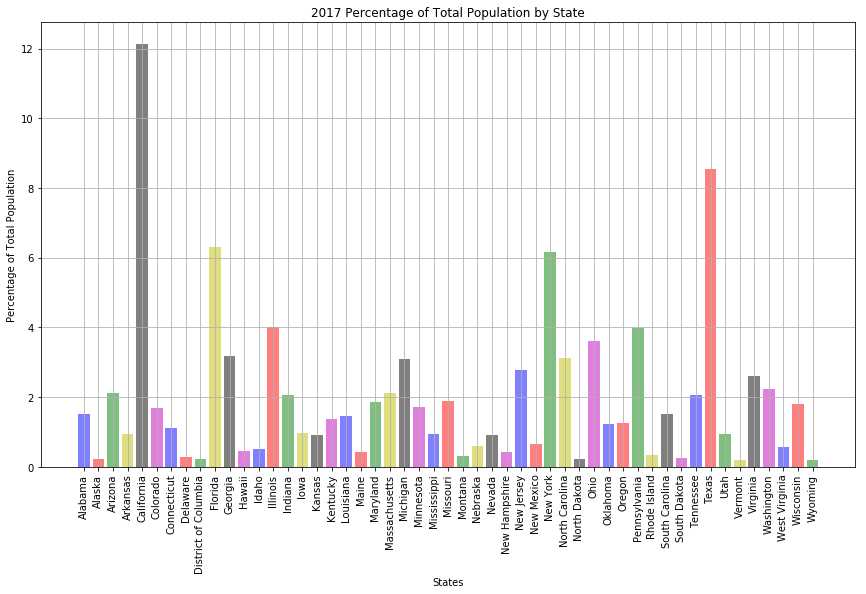

In [61]:
x_axis = np.arange(len(state_pop_per_17))
y_axis = state_pop_per_17["Total_Population 17"]

x_ticks = state_pop_per_17.index
plt.figure(figsize=(12, 8))
plt.xticks(x_axis, x_ticks, rotation=90)
plt.grid()
plt.tight_layout()

# x_axis.color_cycle
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(state_pop_per_17)))

plt.title("2017 Percentage of Total Population by State")
plt.xlabel("States")
plt.ylabel("Percentage of Total Population")

plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5)
# plt.savefig("Images/Total%_Population_State.png")
plt.show()


## Top 5 States with most Females: 2017 by Charleen
* #### Read csv, filter data, and map plot

In [65]:
total_gender_state_df = pd.read_csv("./Output/Demographic/genderallyearsbystate.csv", index_col=0)
sort_gender_state_data = total_gender_state_df.sort_values(by='%_F_17', ascending=False)

sort_gender_state_data.head()

,State,Total_Population 13,%_M_13,%_F_13,Total_Population 14,%_M_14,%_F_14,Total_Population 15,%_M_15,%_F_15,Total_Population 16,%_M_16,%_F_16,Total_Population 17,%_M_17,%_F_17
8,District of Columbia,619371,47.3,52.7,633736,47.3,52.7,647484,47.4,52.6,659009,47.4,52.6,672391,47.4,52.6
7,Delaware,908446,48.4,51.6,917060,48.4,51.6,926454,48.4,51.6,934695,48.4,51.6,943732,48.4,51.6
0,Alabama,4799277,48.5,51.5,4817678,48.5,51.5,4830620,48.5,51.5,4841164,48.5,51.5,4850771,48.5,51.5
39,Rhode Island,1051695,48.3,51.7,1053252,48.4,51.6,1053661,48.4,51.6,1054491,48.5,51.5,1056138,48.5,51.5
20,Maryland,5834299,48.4,51.6,5887776,48.4,51.6,5930538,48.4,51.6,5959902,48.4,51.6,5996079,48.5,51.5


In [66]:
sort_female_state_data = pd.DataFrame(sort_gender_state_data.iloc[0:5,:])
sort_female_state_data.drop(sort_female_state_data.columns[[1,2,4,5,7,8,10,11,13,14]],inplace=True, axis=1)
 
sort_female_state_data

,State,%_F_13,%_F_14,%_F_15,%_F_16,%_F_17
8,District of Columbia,52.7,52.7,52.6,52.6,52.6
7,Delaware,51.6,51.6,51.6,51.6,51.6
0,Alabama,51.5,51.5,51.5,51.5,51.5
39,Rhode Island,51.7,51.6,51.6,51.5,51.5
20,Maryland,51.6,51.6,51.6,51.6,51.5


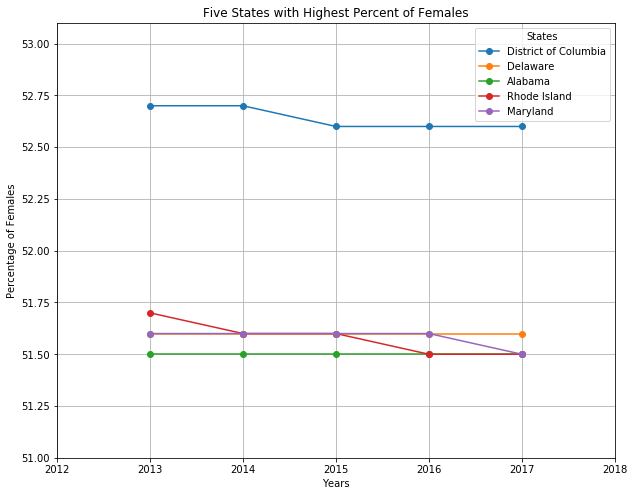

In [67]:
state_list = sort_female_state_data["State"].values.tolist()
years = [2013,2014,2015,2016,2017]
sort_female_state_data = sort_female_state_data.set_index("State")
for item in state_list:
    num_yr = sort_female_state_data.loc[item,["%_F_13","%_F_14","%_F_15","%_F_16","%_F_17"]]
    plt.plot(years, num_yr, marker="o", label=item)
        
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Five States with Highest Percent of Females")
plt.xlabel("Years")
plt.ylabel("Percentage of Females")
plt.xlim(round(min(years) - .5), round(max(years) + .5))
plt.ylim(min(sort_female_state_data["%_F_13"]) - .5, max(sort_female_state_data["%_F_17"]) + .5)
# # Create a legend
plt.legend(title="States", loc='best')


# # Save the plot and display it
plt.savefig("Images/top5_states_%F.png")
plt.show()

## 2015 Crime by Tanique

In [69]:
crime_file_2015 = "./Team/Tanique/Resources/Table_69_Arrest_by_State_2015.xls"
excel_reader_pd_2015 = pd.read_excel(crime_file_2015)
excel_reader_pd_2015.head()

,State,Total Crime,Violent Crime,Property Crime,Murder,Rape,Robbery,Assault,Theft,Vehicle Theft,Arson,Fraud,Embezzlement,Vandalism,Weapons Carrying,Sex Offenses,Drug Violations,DUI,Disorderly Conduct
0,ALABAMA,140450,5537,19386,283,336,1088,3830,15558,727,93,4119,240,1489,1374,457,8967,7863,2187
1,ALASKA,31402,2193,3453,47,118,294,1734,2540,361,67,230,72,898,303,240,1212,3163,795
2,ARIZONA,226367,7161,30609,134,230,1047,5750,26717,1064,156,1505,139,7934,1929,1080,24892,22367,16750
3,ARKANSAS,127083,4667,15771,123,273,589,3682,13357,364,73,1145,54,1350,886,134,12700,6919,2185
4,CALIFORNIA,1158479,107454,127671,1431,2465,15841,87717,65037,17303,1185,6499,972,17143,25946,9395,206194,141458,4674


In [70]:
total_crime_2015 = excel_reader_pd_2015[["State", "Total Crime"]].sort_values('Total Crime', ascending=True)
total_crime_2015.head(5)

,State,Total Crime
8,DISTRICT OF COLUMBIA,7218
45,VERMONT,11183
26,MONTANA,25687
50,WYOMING,27058
39,RHODE ISLAND,27171


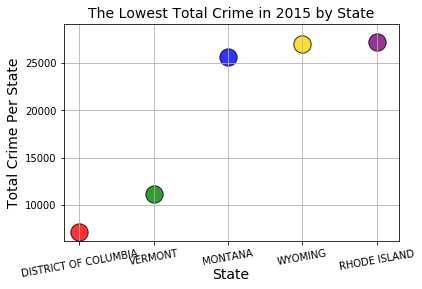

In [72]:
DC_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "DISTRICT OF COLUMBIA")]
DC_X = DC_2015["State"]
DC_Y = DC_2015["Total Crime"]
plt.scatter(DC_X, DC_Y, s=300, marker="o", facecolors="red", edgecolors="black", alpha=0.8, label="DC")

VT_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "VERMONT")]
VT_X = VT_2015["State"]
VT_Y = VT_2015["Total Crime"]
plt.scatter(VT_X, VT_Y, s=300, marker="o", facecolors="green", edgecolors="black", alpha=0.8, label="VT")

MO_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "MONTANA")]
MO_X = MO_2015["State"]
MO_Y = MO_2015["Total Crime"]
plt.scatter(MO_X, MO_Y, s=300, marker="o", facecolors="blue", edgecolors="black", alpha=0.8, label="MO")

WY_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "WYOMING")]
WY_X = WY_2015["State"]
WY_Y = WY_2015["Total Crime"]
plt.scatter(WY_X, WY_Y, s=300, marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label="WY")

RI_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "RHODE ISLAND")]
RI_X = RI_2015["State"]
RI_Y = RI_2015["Total Crime"]
plt.scatter(RI_X, RI_Y, s=300, marker="o", facecolors="purple", edgecolors="black", alpha=0.8, label="RI")

# Incorporate the other graph properties
plt.grid()

plt.xticks(rotation=10)

# # Create a legend
# lgd = plt.legend(title="States")
# for handle in lgd.legendHandles:
#    handle.set_sizes([25.0])

# Create a title, x label, and y label for our chart
plt.title("The Lowest Total Crime in 2015 by State", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("State", fontdict={'fontsize': 14, 'fontweight': 'medium'}, labelpad=-11)
plt.ylabel("Total Crime Per State", fontdict={'fontsize': 14, 'fontweight': 'medium'}, labelpad=4)

# Save Figure
plt.savefig("Images/LowestTotalCrime2015.png")